# Модель расчетов

Расчет профиля и навески разбит на несколько этапов

1. Оптимизация профиля по ионному балансу.
   Профиль оптимизируется по сере и хлору
2. Перерасчет профиля по требуемому EC 
3. Перерасчет профиля по коэфициентам
4. Расчет навески удобрений

# Расчет EC

## Формула Зоневельда

ref: [A UNIVERSAL ALGORITHM FOR CALCULATION OF NUTRIENT SOLUTIONS C. Sonneveld, W. Voogt, L. Spaans](https://www.actahort.org/books/481/481_38.htm) [pdf](https://ru.scribd.com/document/443057487/sonneveld1999)

Выполняется при условии того что ионный баланс равен нулю

$$ \left(
\frac{m_{NH_4}}{M_N} +
     \frac{2  m_{Ca}}{M_{Ca}} + 
     \frac{2  m_{Mg}}{M_{Mg}} +
     \frac{m_{K}}{M_{K}} 
\right)
     - 
     \left(
     \frac{m_{NO_3}}{M_N} + 
     \frac{m_{P}}{M_{P}} +
     \frac{2m_{S}}{M_{S}} + 
     \frac{m_{Cl}}{M_{Cl}} 
     \right)
     = 0 $$
     
Тогда:
     
$$ EC = 0.095  
    \left( 
     \frac{m_{NH_4}}{M_N} +
     \frac{2  m_{Ca}}{M_{Ca}} + 
     \frac{2  m_{Mg}}{M_{Mg}} +
     \frac{m_{K}}{M_{K}}
     \right) + 0.19 $$

Где: \
$M$ --- молярная масса\
$m$ --- профиль, в мг/л (ppm)



In [59]:
m_NO3 = 220
m_NH4 = 20
m_P = 40
m_K = 280
m_Ca = 140
m_Mg = 56
m_S = 51.07
m_Cl = 0

M_N = 14.0067
M_Ca = 40.078
M_Mg = 24.305
M_K = 39.0983
M_P = 30.973
M_S = 32.065
M_Cl = 35.45


cations = ((m_NH4/ M_N) + ((2*m_Ca) / M_Ca) + ((2*m_Mg) / M_Mg) + (m_K / M_K) )

anions = ((m_NO3/ M_N) + (m_P / M_P) + ((2*m_S)/ M_S) + (m_Cl/ M_Cl))


EC = (0.095 * cations) + 0.19
print(cations, anions)
print(f'I = {cations-anions:0.2f}')
print(f'EC = {EC:.3f}')


20.183806662456348 20.183620939926474
I = 0.00
EC = 2.107


## Ионный баланс профиля

Оптимизация профиля достижением нулевого ионного баланса (сумма катионов и анионов должна быть равна нулю)

Основой является формула ионного баланса

$$ \left(
\frac{m_{NH_4}}{M_N} +
     \frac{2  m_{Ca}}{M_{Ca}} + 
     \frac{2  m_{Mg}}{M_{Mg}} +
     \frac{m_{K}}{M_{K}} 
\right)
     - 
     \left(
     \frac{m_{NO_3}}{M_N} + 
     \frac{m_{P}}{M_{P}} +
     \frac{2m_{S}}{M_{S}} + 
     \frac{m_{Cl}}{M_{Cl}} 
     \right)
     = 0 $$

Баланс производится по сере или кальцию, в зависимости от того что крутим



In [60]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install sympy numpy scipy

import sympy as sym
from sympy import Eq
sym.init_printing()
from IPython.display import Math, display, Latex


def display_equation(equation_list):
    l = r"""
\begin{cases} 
  %s \\
\end{cases}
""" % r" \\ ".join(map(sym.latex, equation_list))
    display(Latex(l))

error: externally-managed-environment

× This environment is externally managed
╰─> To install Python packages system-wide, try apt install
    python3-xyz, where xyz is the package you are trying to
    install.
    
    If you wish to install a non-Debian-packaged Python package,
    create a virtual environment using python3 -m venv path/to/venv.
    Then use path/to/venv/bin/python and path/to/venv/bin/pip. Make
    sure you have python3-full installed.
    
    If you wish to install a non-Debian packaged Python application,
    it may be easiest to use pipx install xyz, which will manage a
    virtual environment for you. Make sure you have pipx installed.
    
    See /usr/share/doc/python3.12/README.venv for more information.

note: If you believe this is a mistake, please contact your Python installation or OS distribution provider. You can override this, at the risk of breaking your Python installation or OS, by passing --break-system-packages.
hint: See PEP 668 for the detai

Проверка что профиль сбалансирован
I = 0.000
m_S = 51.07
I = 0.000
Сера через кальций


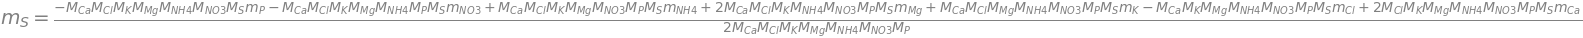

m_S = 73.05
I = 0.000
Кальций через серу


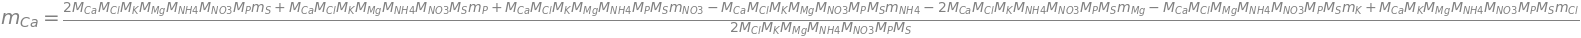

m_Ca = 200.00
I = 0.000


In [61]:
import sympy as sym
sym.init_printing()
elements = ['NO3', 'NH4', 'P', 'K', 'Ca', 'Mg', 'S', 'Cl']

m = dict(zip(elements, sym.symbols([f'm_{e}' for e in elements])))
M = dict(zip(elements, sym.symbols([f'M_{e}' for e in elements])))

repl = {
m['NO3'] : 220,
m['NH4'] : 20,
m['P'] : 40,
m['K'] : 280,    
m['Ca'] : 140,
m['Mg'] : 56,
m['S']: 51.07,
m['Cl']: 0,
    # Молярные массы
M['NO3'] : 14.0067, M['NH4'] : 14.0067, M['Ca'] : 40.078,
M['Mg'] : 24.305, M['K'] : 39.0983, M['P'] : 30.973, M['S'] : 32.065, M['Cl']: 35.45,
}

# Уравнение ионного баланса
Cations = ((m['NH4']/ M['NH4']) + ((2*m['Ca']) / M['Ca']) + ((2*m['Mg']) / M['Mg']) + (m['K'] / M['K']))
Anions = ((m['NO3']/ M['NO3']) + (m['P'] / M['P']) + ((2*m['S'])/ M['S']) + (m['Cl']/ M['Cl']))
Ionic_balance = sym.Eq((Cations - Anions), 0)

I = (Cations - Anions).subs(repl)
print("Проверка что профиль сбалансирован")
print(f"I = {I:0.3f}")

# Решаем уравнение через серу
solved_S = sym.solve([Ionic_balance],(m['S']))[m['S']]

mS = solved_S.subs(repl)

print(f'm_S = {mS:.2f}')

I = (Cations - Anions).subs({**repl, **{m['S']: mS}})
print(f"I = {I:0.3f}")

print("Сера через кальций")

display(sym.Eq(m['S'], solved_S))
r2 = {**repl, **{
    m['NO3'] : 200,
    m['NH4'] : 20,
    m['P'] : 40,
    m['K'] : 180,    
    m['Ca'] : 200,
    m['Mg'] : 50,
}}
mS = solved_S.subs(r2)
print(f'm_S = {mS:.2f}')
r2[m['S']] = mS
I = (Cations - Anions).subs(r2)
print(f"I = {I:0.3f}")

print("Кальций через серу")
r2 = {**r2, **{m['S']: mS}}

solved_Ca = sym.solve([Ionic_balance],(m['Ca']))[m['Ca']]
display(sym.Eq(m['Ca'], solved_Ca))
mCa = solved_Ca.subs(r2)
print(f'm_Ca = {mCa:.2f}')

I = (Cations - Anions).subs({**r2, **{m['Ca']: mCa}})
print(f"I = {I:0.3f}")





In [62]:
print(solved_S)
print(solved_Ca)

(-M_Ca*M_Cl*M_K*M_Mg*M_NH4*M_NO3*M_S*m_P - M_Ca*M_Cl*M_K*M_Mg*M_NH4*M_P*M_S*m_NO3 + M_Ca*M_Cl*M_K*M_Mg*M_NO3*M_P*M_S*m_NH4 + 2*M_Ca*M_Cl*M_K*M_NH4*M_NO3*M_P*M_S*m_Mg + M_Ca*M_Cl*M_Mg*M_NH4*M_NO3*M_P*M_S*m_K - M_Ca*M_K*M_Mg*M_NH4*M_NO3*M_P*M_S*m_Cl + 2*M_Cl*M_K*M_Mg*M_NH4*M_NO3*M_P*M_S*m_Ca)/(2*M_Ca*M_Cl*M_K*M_Mg*M_NH4*M_NO3*M_P)
(2*M_Ca*M_Cl*M_K*M_Mg*M_NH4*M_NO3*M_P*m_S + M_Ca*M_Cl*M_K*M_Mg*M_NH4*M_NO3*M_S*m_P + M_Ca*M_Cl*M_K*M_Mg*M_NH4*M_P*M_S*m_NO3 - M_Ca*M_Cl*M_K*M_Mg*M_NO3*M_P*M_S*m_NH4 - 2*M_Ca*M_Cl*M_K*M_NH4*M_NO3*M_P*M_S*m_Mg - M_Ca*M_Cl*M_Mg*M_NH4*M_NO3*M_P*M_S*m_K + M_Ca*M_K*M_Mg*M_NH4*M_NO3*M_P*M_S*m_Cl)/(2*M_Cl*M_K*M_Mg*M_NH4*M_NO3*M_P*M_S)


## ЕС профиля

Коррекция профиля по EC производится по формуле Зоневельда

$$ EC = 0.095  
    \left( 
     \frac{m_{NH_4}  r}{M_N} +
     \frac{2  m_{Ca} r}{M_{Ca}} + 
     \frac{2  m_{Mg} r}{M_{Mg}} +
     \frac{m_{K} r}{M_{K}}
     \right) + 0.19 $$
     
где:

* $r$ - это коэфициент приведения
* $m$ - это желаемый профиль в ppm
* $M$ - молярная масса

Решаем систему уравнений для NH3 и NO3


<IPython.core.display.Latex object>

Результат


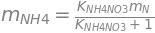

Решаем систему уравнений для N, K, Ca, Mg


<IPython.core.display.Latex object>

Результат


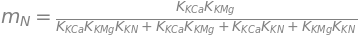

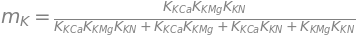

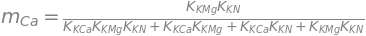

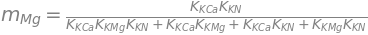

Формула Зонневельда


Текущий EC


<IPython.core.display.Math object>


 Вычисляем смещение для требуемого нового ЕС 

Вычисляем существующие коэфициенты и подставляем


<IPython.core.display.Latex object>

Вычисляем новый npk элементов по коэфициенту r_k
rN=0.3385 rNO3=0.3077 rNH4=0.0308 rK=0.2769 rCa=0.3077 rMg=0.0769
Решаем уравнение с неизвестной r


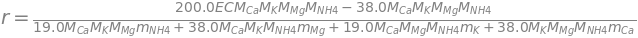

r = 650.00
Проверяем ЕС с вычисленными коэфициентами


<IPython.core.display.Math object>

Проверяем профиль
NO3=200.00
NH4=20.00
K=180.00
Ca=200.00
Mg=50.00
Проверка ионного баланса


<IPython.core.display.Math object>

Коррекция серы для исправления ионного баланса
S=72.44 -> 72.45


Пересчет профиля на EC=1.5
r = 445.34
Проверяем новый ЕС
EC = 1.500
Считаем новый профиль
NO3=137.03
NH4=13.70
K=123.32
Ca=137.03
Mg=34.26
NH4/NO3 = 0.100000000000000
Проверка ионного баланса
I = -1.841
Коррекция серы для исправления ионного баланса
S=72.44 -> 42.93
Проверка ионного баланса
I = 0.000


In [63]:
elements = ['NO3', 'NH4', 'P', 'K', 'Ca', 'Mg', 'S', 'Cl']

r = sym.symbols('r')
EC, NH4NO3, KMg, KCa, KN, PN, N = sym.symbols(['EC', 'K_NH4NO3', 'K_KMg', 'K_KCa', 'K_KN', 'K_PN', 'm_N'])

m = dict(zip(elements, sym.symbols([f'm_{e}' for e in elements])))
M = dict(zip(elements, sym.symbols([f'M_{e}' for e in elements])))

repl = {
    r: 1,
    m['NO3'] : 200,
    m['NH4'] : 20,
    m['P'] : 40,
    m['K'] : 180,    
    m['Ca'] : 200,
    m['Mg'] : 50,
    m['S']: 72.44,
    m['Cl']: 0.0,
    # Молярные массы
    M['NO3'] : 14.0067, M['NH4'] : 14.0067, M['Ca'] : 40.078,
    M['Mg'] : 24.305, M['K'] : 39.0983, M['P'] : 30.0983, M['S'] : 32.065, M['Cl']: 35.45,
}

# Формулы коэфициентов 

NH4NO3f = sym.Eq(m['NH4'] / m['NO3'], NH4NO3)
Nf = sym.Eq(m['NH4'] + m['NO3'], N)


Sum_k = sym.Eq(sum([N, m['K'], m['Ca'], m['Mg']]), 1)
KCaf = sym.Eq(m['K'] / m['Ca'], KCa)
KMgf = sym.Eq(m['K'] / m['Mg'], KMg)
KNf = sym.Eq(m['K'] / N, KN)


# Решаем обратную задачу перевода из коэфициентов в элементы

# Решаем систему уравнений
NH4NO3_s = sym.solve([NH4NO3f, Nf], [m['NH4'], m['NO3']])

print("Решаем систему уравнений для NH3 и NO3")
display_equation([
    Nf,
    NH4NO3f,
    
])
print("Результат")
display(sym.Eq(m['NH4'], NH4NO3_s[m['NH4']]))
display(sym.Eq(m['NO3'], NH4NO3_s[m['NO3']]))


Elements = [N, m['K'], m['Ca'], m['Mg']]
NKCaMg_s = sym.solve([Sum_k, KNf, KCaf, KMgf], Elements)

print("Решаем систему уравнений для N, K, Ca, Mg")
display_equation([
    Sum_k, KNf, KCaf, KMgf
])
print("Результат")
for e in Elements:
    display(sym.Eq(e, NKCaMg_s[e]))



# Уравнение ионного баланса
Cations = (
    ((m['NH4'] * r) / M['NH4']) 
           + ((2*m['Ca']*r) / M['Ca']) 
           + ((2*m['Mg']*r) / M['Mg']) 
           + ((m['K']*r) / M['K'])
          )
Anions = ((m['NO3']/ M['NO3']) + (m['P'] / M['P']) + ((2*m['S'])/ M['S']) + (m['Cl']/ M['Cl']))

print("Формула Зонневельда")
ECf = sym.Eq(EC, 0.095 * (Cations) + 0.19, evaluate=None)

display(ECf) 
# Вычисляем текущий EC
ECv = ECf.subs(repl).rhs
print('Текущий EC')
display(Math(f'EC = {ECv:0.3f}'))

print("\n Вычисляем смещение для требуемого нового ЕС \n")

print("Вычисляем существующие коэфициенты и подставляем")


r_k = {
    N: m['NO3'] + m['NH4'],
    NH4NO3: m['NH4'] / m['NO3'],
    KCa: m['K'] / m['Ca'],
    KMg: m['K'] / m['Mg'],
}
r_k[KN] = m['K'] / r_k[N]

display_equation([sym.Eq(k, v)  for k, v in r_k.items()])

r_k = {k: v.subs(repl).n() for k, v in r_k.items()}
display(r_k)

print("Вычисляем новый npk элементов по коэфициенту r_k")

rN = NKCaMg_s[N].subs(r_k)
rK = NKCaMg_s[m['K']].subs(r_k)
rCa = NKCaMg_s[m['Ca']].subs(r_k)
rMg = NKCaMg_s[m['Mg']].subs(r_k)

rNH4 = NH4NO3_s[m['NH4']].subs({**r_k, N: rN})
rNO3 = NH4NO3_s[m['NO3']].subs({**r_k, N: rN})


print(f'rN={rN:.4f} rNO3={rNO3:.4f} rNH4={rNH4:.4f} rK={rK:.4f} rCa={rCa:.4f} rMg={rMg:.4f}')


# Решаем уравнение
print("Решаем уравнение с неизвестной r")
display(ECf)
solved_r = sym.solve([ECf],(r))[r]

display(sym.Eq(r, solved_r))

ECnew = ECv
r2 = {**repl, 
    EC: ECnew,
      
    m['NH4'] : rNH4,
    m['NO3']: rNO3,
    m['K'] : rK,    
    m['Ca'] : rCa,
    m['Mg'] : rMg,
                  }

# Вычисляем коэфициент
r_k = solved_r.subs(r2)

print(f'r = {r_k:0.2f}')


print('Проверяем ЕС с вычисленными коэфициентами')
EC_p = EC.subs({**r2, 
                r: r_k
                  })

display(Math(f'EC = {EC_p:0.3f}'))


print('Проверяем профиль')
r3 = dict(repl)
for e in ['NO3', 'NH4', 'K', 'Ca', 'Mg']:
    
    mE = r2[m[e]] * r_k
    r3[m[e]] = mE
    print(f'{e}={mE:.2f}')
    
I = (Cations - Anions).subs(r3)
print("Проверка ионного баланса")
display(Math(f"I = {I:0.3f}")   )

print("Коррекция серы для исправления ионного баланса")
mS = solved_S.subs(r3)
print(f'S={r3[m["S"]]:0.2f} -> {mS:0.2f}')
    
# Фосфор - неизменен, сера пересчитывается по балансу



print("\n\nПересчет профиля на EC=1.5")

r2 = {**r2, 
    EC: 1.5,
    m['NH4'] : rNH4,
    m['K'] : rK,    
    m['Ca'] : rCa,
    m['Mg'] : rMg,
                  }

# Вычисляем коэфициент
r_k = solved_r.subs(r2)

print(f'r = {r_k:0.2f}')


print('Проверяем новый ЕС')
EC_p = EC.subs({**r2, 
                r: r_k
                  })

print(f'EC = {EC_p:0.3f}')


print('Считаем новый профиль')
r3 = dict(repl)
for e in ['NO3', 'NH4', 'K', 'Ca', 'Mg']:
    
    mE = r2[m[e]] * r_k
    r3[m[e]] = mE
    print(f'{e}={mE:.2f}')
    
print(f"NH4/NO3 = {r3[m['NH4']] / r3[m['NO3']]}")
I = (Cations - Anions).subs(r3)

print("Проверка ионного баланса")
print(f"I = {I:0.3f}")    

mS = solved_S.subs(r3)
print("Коррекция серы для исправления ионного баланса")
print(f'S={r3[m["S"]]:0.2f} -> {mS:0.2f}')

print("Проверка ионного баланса")
I = (Cations - Anions).subs({**r3, m['S']: mS})
print(f"I = {I:0.3f}")



In [64]:
# Печатаем уравнения для кодирования
for e, f in NH4NO3_s.items():
    print(f'{e} = {f}')
for e, f in NKCaMg_s.items():
    print(f'{e} = {f}')
    
print(f'r = {solved_r}')

m_NH4 = K_NH4NO3*m_N/(K_NH4NO3 + 1)
m_NO3 = m_N/(K_NH4NO3 + 1)
m_Ca = K_KMg*K_KN/(K_KCa*K_KMg*K_KN + K_KCa*K_KMg + K_KCa*K_KN + K_KMg*K_KN)
m_K = K_KCa*K_KMg*K_KN/(K_KCa*K_KMg*K_KN + K_KCa*K_KMg + K_KCa*K_KN + K_KMg*K_KN)
m_Mg = K_KCa*K_KN/(K_KCa*K_KMg*K_KN + K_KCa*K_KMg + K_KCa*K_KN + K_KMg*K_KN)
m_N = K_KCa*K_KMg/(K_KCa*K_KMg*K_KN + K_KCa*K_KMg + K_KCa*K_KN + K_KMg*K_KN)
r = (200.0*EC*M_Ca*M_K*M_Mg*M_NH4 - 38.0*M_Ca*M_K*M_Mg*M_NH4)/(19.0*M_Ca*M_K*M_Mg*m_NH4 + 38.0*M_Ca*M_K*M_NH4*m_Mg + 19.0*M_Ca*M_Mg*M_NH4*m_K + 38.0*M_K*M_Mg*M_NH4*m_Ca)


## Расчет навески

### Решение через систему линейных уравнений



Решаем систему уравнений


<IPython.core.display.Latex object>

Уравнения по каждому удобрению


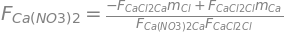

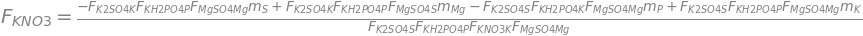

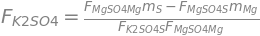

Подставля процентовку удобрений получаем расчет, в г


Проверка профиля
NO3 = 200 - 200.53 = 0.53
NH4 = 20 - 20.00 = 0
P = 40 - 40.00 = 0
K = 180 - 180.00 = 0.0
Ca = 200 - 200.00 = 0.0
Mg = 50 - 50.00 = 0
S = 67.9239233594011 - 67.92 = 0
Cl = 10 - 10.00 = 0


In [65]:
'''
Решение через уравнение
'''
elements = ['NO3', 'NH4', 'P', 'K', 'Ca', 'Mg', 'S', 'Cl']
Fertilizers = [
    'Ca(NO3)2',
       
    'KNO3',
       
    'NH4NO3',
        
    'MgSO4',
        
    'KH2PO4',
        
    'K2SO4',
        
   # 'Mg(NO3)2',
    
    'CaCl2',
    
    
]

F = dict(zip(Fertilizers, sym.symbols([f'F_{e}' for e in Fertilizers])))

m = dict(zip(elements, sym.symbols([f'm_{e}' for e in elements])))
M = dict(zip(elements, sym.symbols([f'M_{e}' for e in elements])))



F_elems = [
    #['NO3', ['Ca(NO3)2', 'KNO3', 'NH4NO3']],
    ['NH4', ['NH4NO3']],
    ['P', ['KH2PO4']],
    ['K', ['KNO3', 'KH2PO4', 'K2SO4']],
    ['Ca', ['CaCl2', 'Ca(NO3)2']],
    ['Mg', ['MgSO4', 'Mg(NO3)2']],
    ['S', ['MgSO4', 'K2SO4']],
    ['Cl', ['CaCl2']],
    
]
System = []

for [el, fer] in F_elems:
    for _f in fer:
        if _f in Fertilizers:
            F[f'{_f}_{el}'] = sym.symbols(f'F_{_f}_{el}')
        
    System.append(
        Eq(m[el],
           sum([F[_f]*F[f'{_f}_{el}'] for _f in fer if _f in Fertilizers])
                    ))
    

print("Решаем систему уравнений")
display_equation(System)

ferts = sym.solve(System, [F[_f] for _f in Fertilizers])


print("Уравнения по каждому удобрению")
for _f in Fertilizers:
    if _f in Fertilizers:
        display(
            Eq(F[_f], ferts[F[_f]])
        )
    
    

repl = {
    #NPK
    m['NO3'] : 200,
    m['NH4'] : 20,
    m['P'] : 40,
    m['K'] : 180,    
    m['Ca'] : 200,
    m['Mg'] : 50,
    m['S']: 68.52,
    m['Cl']: 10,
    # Молярные массы
    M['NO3'] : 14.0067, M['NH4'] : 14.0067, M['Ca'] : 40.078,
    M['Mg'] : 24.305, M['K'] : 39.0983, M['P'] : 30.0983, M['S'] : 32.065, M['Cl']: 35.45,
}
repl[m['S']] = solved_S.subs(repl)
ferts_perc ={
    # Процентовки
    'Ca(NO3)2_Ca':16.972,
    'Ca(NO3)2_NO3':11.863,
       
    'KNO3_K':38.672,
    'KNO3_NO3':13.854,
       
    'NH4NO3_NO3':17.499,
    'NH4NO3_NH4':17.499,
        
    'MgSO4_Mg':9.861,
    'MgSO4_S':13.010,
        
    'KH2PO4_K':28.731,
    'KH2PO4_P':22.761,
        
    'K2SO4_K':44.874,
    'K2SO4_S':18.401,
        
    'Mg(NO3)2_Mg': 9.479,
    'Mg(NO3)2_NO3': 10.925,

    'CaCl2_Ca':18.294,
    'CaCl2_Cl':32.366,
}

for [k, v] in ferts_perc.items():
    if k in F:
        repl[F[k]] = v


print("Подставля процентовку удобрений получаем расчет, в г")
weights = {}
for _f in Fertilizers:
    w = ferts[F[_f]].subs(repl)
    display(Eq(F[_f], round(w,4)))
    weights[_f] = w


print("Проверка профиля")

for _e in elements:
    Ep = repl[m[_e]]
    Ef = 0
    for _f in Fertilizers:
        k = f'{_f}_{_e}'
        if k in ferts_perc and _f in weights:
            Ef += weights[_f] * (ferts_perc[k])
    
    print(f'{_e} = {Ep} - {Ef:0.2f} = {round(Ef - Ep,2)}')
    





### Алгоритмическое решение методом перебора

В калькуляторе используется этот метод получения навески, т.к. у нас есть неизвестное количество удобрений и они могут быть комплексными.

Весь алгоритм заключается в том что по каждому удобрению в цикле мы получаем минимально возможную навеску и эта навеска вычитается из NPK до тех пор пока NPK не станет близок к нулю или нет возможности получить навеску по оставшемуся NPK

In [66]:
"""
Алгоритмическое решение
"""


elements = ['NO3', 'NH4', 'P', 'K', 'Ca', 'Mg', 'S', 'Cl']
Fertilizers = [
    'K2SO4',
    'Ca(NO3)2',   
    'KNO3',     
    'NH4NO3',
    
    
        
    'MgSO4',
       
    'KH2PO4',
        
    
        
    #'Mg(NO3)2',
    'CaCl2',
    
    
]

F_elems = dict([
    ['NO3', ['Ca(NO3)2', 'KNO3', 'NH4NO3', 'Mg(NO3)2']],
    ['NH4', ['NH4NO3']],
    ['P', ['KH2PO4']],
    ['K', ['KNO3', 'KH2PO4', 'K2SO4']],
    ['Ca', ['CaCl2', 'Ca(NO3)2']],
    ['Mg', ['MgSO4', 'Mg(NO3)2']],
    ['S', ['MgSO4', 'K2SO4']],
    ['Cl', ['CaCl2']],    
]    )
npk = {
    'NO3' : 200,
    'NH4' : 20,
    'P' : 40,
    'K' : 180,    
    'Ca' : 200,
    'Mg' : 56,
    'Cl': 10,  
    'S': 67.92,
}
# Хардкод нпк удобрений
ferts_perc ={
    # Процентовки
    'Ca(NO3)2_Ca':16.972,
    'Ca(NO3)2_NO3':11.863,
       
    'KNO3_K':38.672,
    'KNO3_NO3':13.854,
       
    'NH4NO3_NO3':17.499,
    'NH4NO3_NH4':17.499,
        
    'MgSO4_Mg':9.861,
    'MgSO4_S':13.010,
        
    'KH2PO4_K':28.731,
    'KH2PO4_P':22.761,
        
    'K2SO4_K':44.874,
    'K2SO4_S':18.401,
        
    'Mg(NO3)2_Mg': 9.479,
    'Mg(NO3)2_NO3': 10.925,

    'CaCl2_Ca':18.294,
    'CaCl2_Cl':32.366,
}
for (k, v) in list(ferts_perc.items()):
    f, el = k.split('_')
    if f not in ferts_perc:
        ferts_perc[f] = {}
    ferts_perc[f][el] = v
    
#print(ferts_perc)
  
    

dNPK = dict(sorted(npk.items(), key=lambda i: i[1]))

#print(dNPK)

print("Полученная навеска")

weights = {}

# Сообственно тут идет расчет перебором
for el in dNPK:
    for _f in Fertilizers:
        
        if _f not in F_elems[el]:
            continue
        if el == 'NO3':
            continue
        if _f in weights or _f not in Fertilizers:
            continue
        perc = dict(ferts_perc[_f])
        w = dNPK[el] / perc.pop(el)
        
        print(f'{_f} = {round(w,4)}г.')
        for _el, _p in perc.items():
            # вычитается навеска из NPK
            dNPK[_el] -= w * _p
        weights[_f] = w

        


print("Проверка профиля, разница между ожидаемым профилем и фактическим ")

for _e in elements:
    Ep = npk[_e]
    Ef = 0
    for _f in Fertilizers:
        k = f'{_f}_{_e}'
        if k in ferts_perc and _f in weights:
            Ef += weights[_f] * (ferts_perc[k])
    
    print(f'{_e} = {Ep:0.2f} - {Ef:0.2f} = {round(Ep - Ef,2)}')
    

# На данный момент оно собирает неточно


Полученная навеска
CaCl2 = 0.309г.
NH4NO3 = 1.1429г.
KH2PO4 = 1.7574г.
MgSO4 = 5.6789г.
K2SO4 = -0.3241г.
KNO3 = 3.7249г.
Ca(NO3)2 = 11.4511г.
Проверка профиля, разница между ожидаемым профилем и фактическим 
NO3 = 200.00 - 207.45 = -7.45
NH4 = 20.00 - 20.00 = 0.0
P = 40.00 - 40.00 = 0.0
K = 180.00 - 180.00 = 0.0
Ca = 200.00 - 200.00 = 0.0
Mg = 56.00 - 56.00 = 0.0
S = 67.92 - 67.92 = 0.0
Cl = 10.00 - 10.00 = 0.0


In [81]:
"""
Попытка решения системами линейных уравнений
"""
# Пока не работает
elements = ['NO3', 'NH4', 'P', 'K', 'Ca', 'Mg', 'S', 'Cl']
Fertilizers = [
    'K2SO4',
    'Ca(NO3)2',   
    'KNO3',     
    'NH4NO3',
         
    'MgSO4',      
    'KH2PO4',
    
    #'Mg(NO3)2',
    'CaCl2',
    
]

F_elems = dict([
    ['NO3', ['Ca(NO3)2', 'KNO3', 'NH4NO3', 'Mg(NO3)2']],
    ['NH4', ['NH4NO3']],
    ['P', ['KH2PO4']],
    ['K', ['KNO3', 'KH2PO4', 'K2SO4']],
    ['Ca', ['CaCl2', 'Ca(NO3)2']],
    ['Mg', ['MgSO4', 'Mg(NO3)2']],
    ['S', ['MgSO4', 'K2SO4']],
    ['Cl', ['CaCl2']],    
]    )
npk = {
    'NO3' : 200,
    'NH4' : 20,
    'P' : 40,
    'K' : 180,    
    'Ca' : 200,
    'Mg' : 56,
    'Cl': 10,  
    'S': 67.92,
}

ferts_perc ={
    # Процентовки
    'Ca(NO3)2_Ca':16.972,
    'Ca(NO3)2_NO3':11.863,
       
    'KNO3_K':38.672,
    'KNO3_NO3':13.854,
       
    'NH4NO3_NO3':17.499,
    'NH4NO3_NH4':17.499,
        
    'MgSO4_Mg':9.861,
    'MgSO4_S':13.010,
        
    'KH2PO4_K':28.731,
    'KH2PO4_P':22.761,
        
    'K2SO4_K':44.874,
    'K2SO4_S':18.401,
        
    'Mg(NO3)2_Mg': 9.479,
    'Mg(NO3)2_NO3': 10.925,

    'CaCl2_Ca':18.294,
    'CaCl2_Cl':32.366,
}

for (k, v) in list(ferts_perc.items()):
    f, el = k.split('_')
    if f not in ferts_perc:
        ferts_perc[f] = {}
    ferts_perc[f][el] = v

# Решение

A = []

for el, ferts in F_elems.items():
    r = []
    for f in Fertilizers:
        if f not in ferts:
            r.append(0)
        else:
            r.append(ferts_perc[f][el])
    A.append(r)       

B = [[npk[el]] for el in F_elems]

print(A)
print(B)

print(len(A[0]), len(B))

A_len = len(A[0])
B_len = len(B)

if A_len < B_len:
    for i in range(B_len - A_len):
        for r in A:
            r.append(1)        

r = [i[0] for i in numpy.linalg.solve(A,B)]

print(r[-1])
weights = dict(zip(Fertilizers, r))

for f, w in weights.items():
    print(f'{f} = {w:.2f}')
# Проверка

print("Проверка профиля")

for _e in elements:
    Ep = npk[_e]
    Ef = 0
    for _f in Fertilizers:
        k = f'{_f}_{_e}'
        if k in ferts_perc and _f in weights:
            Ef += weights[_f] * (ferts_perc[k])
    
    print(f'{_e} = {Ep:0.2f} - {Ef:0.2f} = {round(Ep - Ef,2)}')
  


[[0, 11.863, 13.854, 17.499, 0, 0, 0], [0, 0, 0, 17.499, 0, 0, 0], [0, 0, 0, 0, 0, 22.761, 0], [44.874, 0, 38.672, 0, 0, 28.731, 0], [0, 16.972, 0, 0, 0, 0, 18.294], [0, 0, 0, 0, 9.861, 0, 0], [18.401, 0, 0, 0, 13.01, 0, 0], [0, 0, 0, 0, 0, 0, 32.366]]
[[200], [20], [40], [180], [200], [56], [67.92], [10]]
7 8
15.236063909134588
K2SO4 = -0.06
Ca(NO3)2 = 11.06
KNO3 = 3.52
NH4NO3 = 0.27
MgSO4 = 4.13
KH2PO4 = 1.09
CaCl2 = -0.16
Проверка профиля
NO3 = 200.00 - 184.76 = 15.24
NH4 = 20.00 - 4.76 = 15.24
P = 40.00 - 24.76 = 15.24
K = 180.00 - 164.76 = 15.24
Ca = 200.00 - 184.76 = 15.24
Mg = 56.00 - 40.76 = 15.24
S = 67.92 - 52.68 = 15.24
Cl = 10.00 - -5.24 = 15.24
